# **Model Prediksi Berbasis Machine Learning untuk Diagnosis Risiko Terjadinya Stroke Berdasarkan Analisis Faktor Hipertensi dari Data Pasien**
---
By : [Firda Aulia Rakhmah](https://www.dicoding.com/users/firda_aulia_rakhmah)

# **Deskripsi Proyek**

**Latar Belakang Proyek**


Stroke merupakan salah satu penyebab utama kematian dan kecacatan di seluruh dunia. Faktor risiko seperti hipertensi (tekanan darah tinggi) telah diketahui sebagai salah satu penyebab utama terjadinya stroke. Dengan adanya data medis yang semakin berkembang, metode berbasis *Machine Learning* (ML) dapat memberikan solusi yang efektif untuk menganalisis risiko pasien terkena stroke, khususnya berdasarkan riwayat hipertensi mereka. Memprediksi risiko stroke sejak dini dapat membantu pengambilan keputusan medis yang lebih tepat waktu, dan pada akhirnya menyelamatkan lebih banyak nyawa.

<br>


**Tujuan proyek**

Proyek ini bertujuan untuk membangun model prediksi berbasis *Machine Learning* yang dapat membantu mendiagnosis risiko terjadinya stroke pada pasien dengan mempertimbangkan faktor hipertensi dan faktor risiko lainnya yang relevan. Model ini akan dikembangkan menggunakan data historis pasien untuk mempelajari pola dan hubungan antara hipertensi serta risiko stroke.

## **Import library**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd '/content/gdrive/MyDrive/2-Kuliah/Dicoding'

/content/gdrive/MyDrive/2-Kuliah/Dicoding


In [3]:
# Data manipulation
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# Machine learning
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score, r2_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


## **Data Understanding**

Berikut ini adalah informasi mengenai dataset yang digunakan sebagai bahan penyelesaian proyek.

<br>


| Jenis | Keterangan |
| ------ | ------ |
| Title | Stroke Prediction Dataset |
| Source | [Kaggle](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset/data) |
| Visibility | Publik |
| Tags | Health, Health Conditions, Public Health, Healthcare, Binary Classification|
| Usability | 10.00 |



### Membaca dataset

In [4]:
df = pd.read_csv('Stroke Dataset.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


Dari dataframe yang di tampilkan di atas, kita dapat menyimpulkan bahwa pada dataset ini memiliki beberapa atribut (kolom) yang ada didalamnya. Berikut adalah penjelasan mengenai atribut dalam dataset risiko stroke:



- `id` : Nomor unik yang dimiliki oleh setiap subjek dalam dataset.
- `gender` : Menyatakan jenis kelamin subjek (misalnya, laki-laki atau perempuan).
- `age` : Usia subjek dalam dataset.
- `hypertension` : Menunjukkan apakah subjek memiliki riwayat hipertensi. Nilai 0 berarti tidak memiliki hipertensi, sedangkan nilai 1 berarti subjek mengidap hipertensi.
- `heart_disease` : Menyatakan apakah subjek memiliki penyakit jantung. Nilai 0 berarti tidak memiliki penyakit jantung, sedangkan nilai 1 berarti subjek mengidap penyakit jantung.
-` ever_married` : Menyatakan status pernikahan subjek, apakah sudah pernah menikah atau belum.
- `work_type` : Menggambarkan jenis pekerjaan yang dimiliki oleh subjek.
- `Residence_type` : Menunjukkan jenis tempat tinggal subjek, apakah tinggal di daerah perkotaan atau pedesaan.
- `avg_glucose_level` : Menyatakan kadar gula darah rata-rata subjek.
- `bmi` : Indeks Massa Tubuh (BMI) yang menggambarkan kategori berat badan subjek.
- `smoking_status` : Menunjukkan kebiasaan merokok subjek, apakah perokok aktif, mantan perokok, atau tidak merokok
- `stroke` : Variabel target yang menyatakan apakah subjek telah terdiagnosis stroke. Nilai 0 menunjukkan tidak terkena stroke, sedangkan nilai 1 menunjukkan subjek terkena stroke.

### Melihat jumlah baris dan kolom

In [5]:
df.shape

(5110, 12)

### Melihat informasi pada dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


**Penjelasan :**



- `RangeIndex` : Dataset memiliki 5110 baris, dari indeks 0 hingga 5109.
- `Data Columns` : Terdapat 12 kolom dalam dataset.
- `Non-Null Count` : Menunjukkan jumlah nilai yang tidak kosong dalam setiap kolom. Kolom bmi memiliki 4909 nilai non-null, yang berarti ada 201 baris dengan nilai yang hilang (NaN).
- `Dtype` : Tipe data dari setiap kolom. Misalnya, gender adalah tipe objek (string), sedangkan age adalah tipe float64.
- `Memory Usage` : Dataset menggunakan sekitar 479.3 KB di memori.

### Check total missing value tiap kolom

In [7]:
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


**Penjelasan :**

Dari data di atas dapat di simpulkan bahwa kolom id, gender, age, hypertension heart_disease, ever_married, work_type, Residence_type, avg_glucose_level smoking_status, stroke memiliki jumlah nilai null (hilang) 0 yang berarti data di dalamnya lengkap. sedangkan, untuk kolom bmi memiliki 201 data yang nilainya hilang.

### Check data duplicate

In [8]:
df.duplicated().sum()

0

### Check data apakah sudah balance ?

In [9]:
df.stroke.value_counts()

,count
stroke,
0,4861
1,249


## **Visualisasi Data**

### **Visualisasi Univariate Analysis**

Visualisasi Univariate Analysis adalah proses menganalisis dan menggambarkan distribusi satu variabel pada satu waktu, untuk memahami karakteristik dan perilakunya. Dalam analisis univariate, fokusnya adalah pada satu variabel, baik itu numerik atau kategorikal. Pada tahap ini dilakukan untuk melihat distribusi data setiap variabel

In [10]:
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


#### **Distribusi jumlah subjek berdasarkan jenis kelamin**





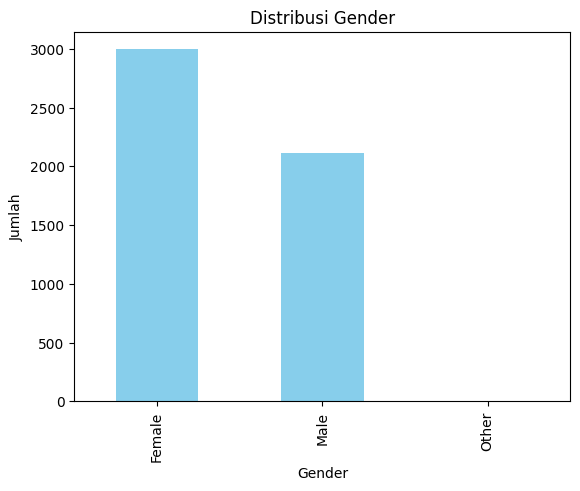

In [11]:
df['gender'].value_counts().plot(kind='bar', color='skyblue')

# Judul dan label sumbu
plt.title('Distribusi Gender')
plt.xlabel('Gender')
plt.ylabel('Jumlah')

plt.show()


#### **Distribusi jumlah subjek berdasarkan status pernikahan**


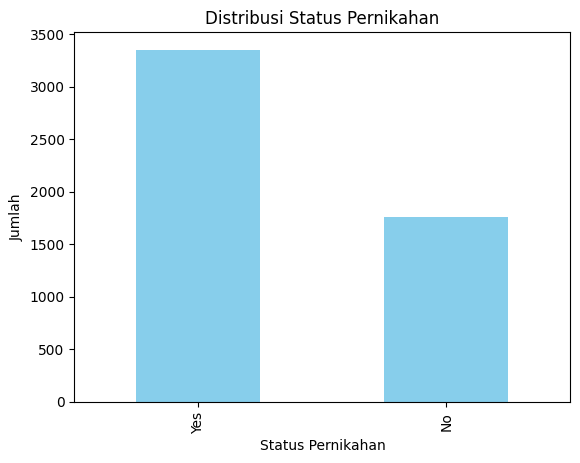

In [12]:
df['ever_married'].value_counts().plot(kind='bar', color='skyblue')

# Judul dan label sumbu
plt.title('Distribusi Status Pernikahan')
plt.xlabel('Status Pernikahan')
plt.ylabel('Jumlah')

plt.show()

#### **Distribusi  jumlah subjek berdasarkan jenis pekerjaan**

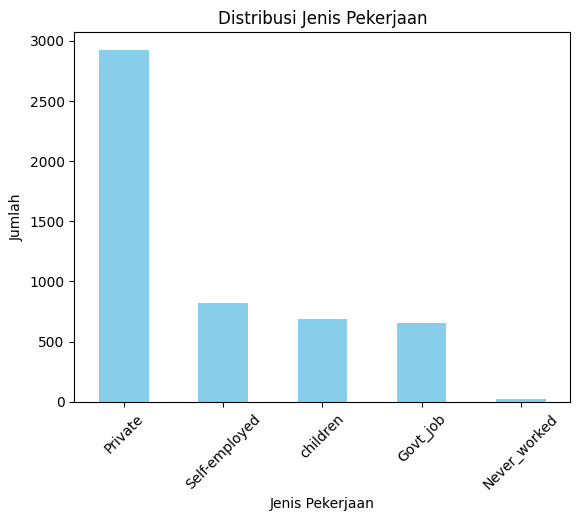

In [13]:
df['work_type'].value_counts().plot(kind='bar', color='skyblue')

# Judul dan label sumbu
plt.title('Distribusi Jenis Pekerjaan')
plt.xlabel('Jenis Pekerjaan')
plt.ylabel('Jumlah')

plt.xticks(rotation=45)
plt.show()

#### **Distribusi subjek berdasarkan tempat tinggal, apakah mereka tinggal di area urban atau rural**

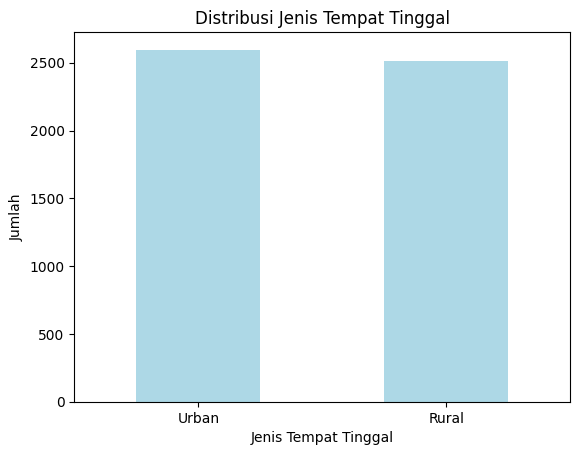

In [14]:
df['Residence_type'].value_counts().plot(kind='bar', color='lightblue')

# Judul dan label sumbu
plt.title('Distribusi Jenis Tempat Tinggal')
plt.xlabel('Jenis Tempat Tinggal')
plt.ylabel('Jumlah')

plt.xticks(rotation=0)
plt.show()

#### **Distribusi dari fitur numerik dalam dataset**

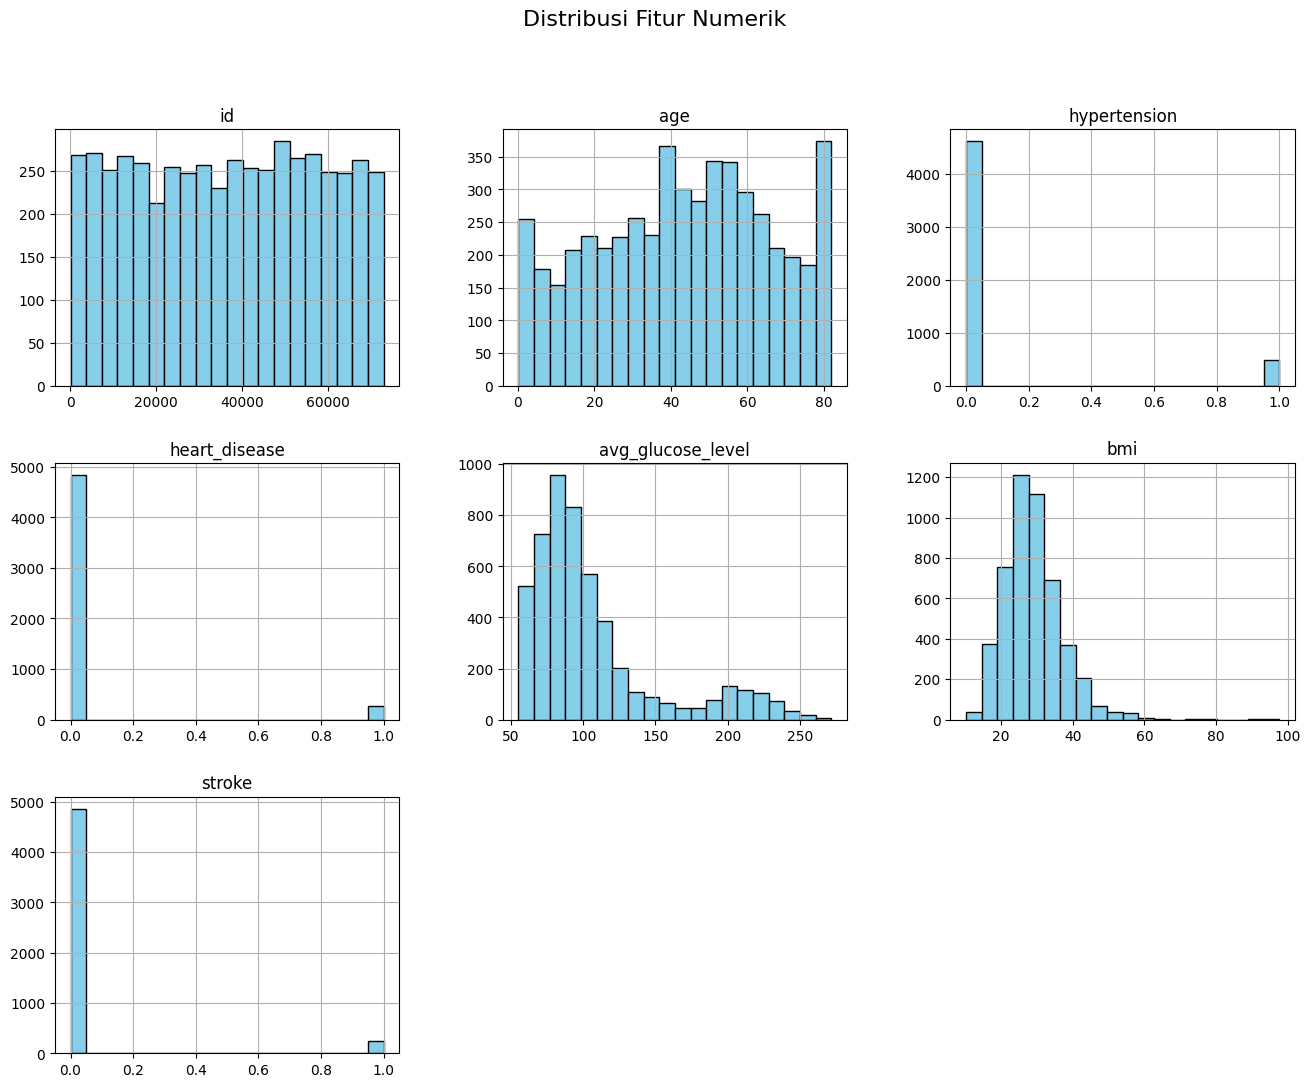

In [15]:
# Membuat histogram untuk semua kolom numerik
df.hist(figsize=(16, 12), bins=20, color='skyblue', edgecolor='black')

# Menampilkan grafik
plt.suptitle('Distribusi Fitur Numerik', fontsize=16)
plt.show()

#### **Visualisasi data hipertensi yang berkaitan dengan stroke ?**





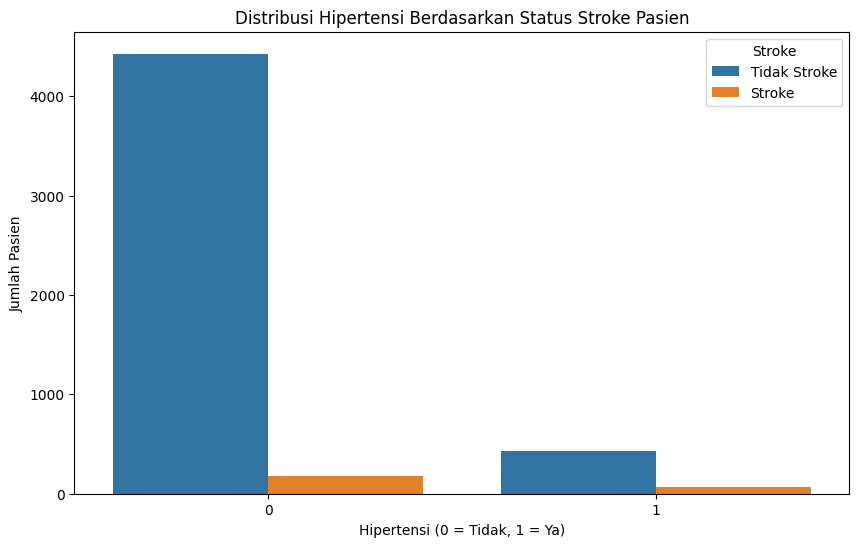

In [16]:
# Bagaimana visualisasi hipertensi yang berkaitan dengan stroke ?

plt.figure(figsize=(10, 6))
sns.countplot(x='hypertension', hue='stroke', data=df)
plt.title('Distribusi Hipertensi Berdasarkan Status Stroke Pasien')

plt.xlabel('Hipertensi (0 = Tidak, 1 = Ya)')
plt.ylabel('Jumlah Pasien')

plt.legend(title='Stroke', labels=['Tidak Stroke', 'Stroke'])
plt.show()

#### **Hubungan usia dengan risiko terjadinya stroke ?**

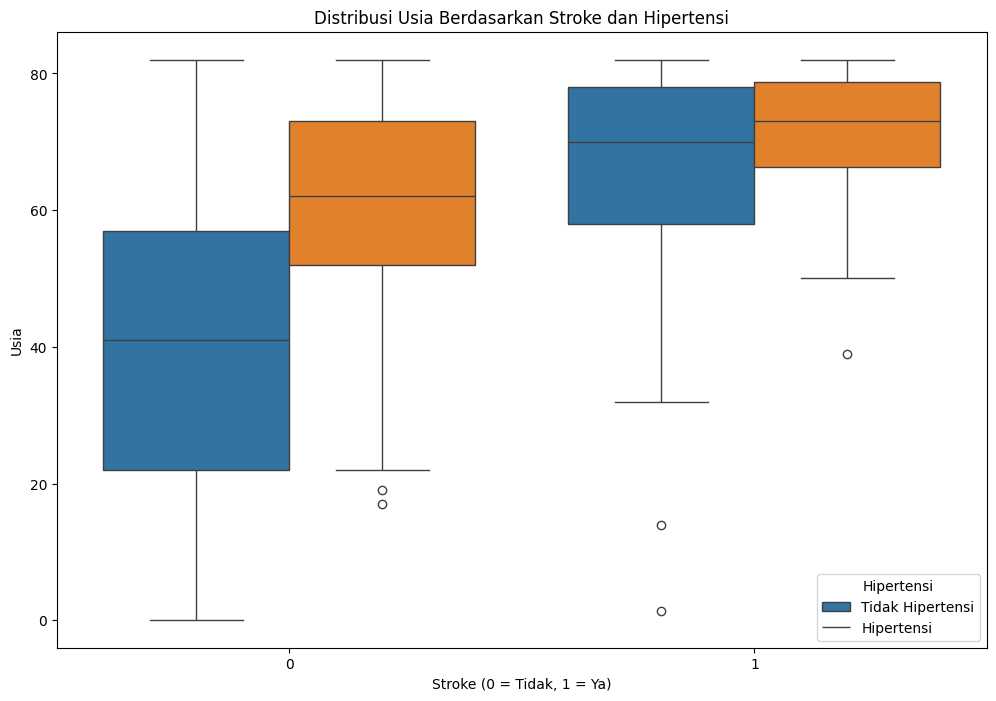

In [17]:
# Hubungan usia dengan risiko terjadinya stroke

plt.figure(figsize=(12, 8))
sns.boxplot(x='stroke', y='age', hue='hypertension', data=df)
plt.title('Distribusi Usia Berdasarkan Stroke dan Hipertensi')

plt.xlabel('Stroke (0 = Tidak, 1 = Ya)')
plt.ylabel('Usia')

plt.legend(title='Hipertensi', labels=['Tidak Hipertensi', 'Hipertensi'])
plt.show()

## **Data Preparation**

Data preparation adalah proses mempersiapkan data mentah untuk dianalisis dengan membersihkan, mengubah, dan menyusun data agar sesuai dengan kebutuhan analisis.Tujuannya adalah untuk memastikan data yang digunakan dalam analisis berkualitas tinggi, konsisten, dan sesuai dengan model yang akan diterapkan, sehingga hasil analisis lebih akurat dan dapat diandalkan.

In [18]:
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Drop kolom yang tidak diperlukan

In [19]:
df.drop("id",axis=1,inplace=True)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


kolom yang harus di hapus adalah id, karena id tidak memiliki kepentingan untuk dimasukkan ke dalam pembuatan model Machine Learning.

## Menghapus kategori kolom yang tidak diperukan untuk pembuatan model machine learning

In [20]:
categorical = list(df.dtypes[df.dtypes == 'object'].index)
categorical
for col in categorical:
    df[col] = df[col].str.lower().str.replace(" ", "_")

In [21]:
for col in categorical:
    print(col)
    print(df[col].unique())

gender
['male' 'female' 'other']
ever_married
['yes' 'no']
work_type
['private' 'self-employed' 'govt_job' 'children' 'never_worked']
Residence_type
['urban' 'rural']
smoking_status
['formerly_smoked' 'never_smoked' 'smokes' 'unknown']


In [22]:
df.drop(df.loc[df['smoking_status']=='unknown'].index, inplace=True)

In [23]:
df.drop(df.loc[df['gender']=='other'].index, inplace=True)

In [24]:
df.reset_index(drop=True)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,male,67.0,0,1,yes,private,urban,228.69,36.6,formerly_smoked,1
1,female,61.0,0,0,yes,self-employed,rural,202.21,NaN,never_smoked,1
2,male,80.0,0,1,yes,private,rural,105.92,32.5,never_smoked,1
3,female,49.0,0,0,yes,private,urban,171.23,34.4,smokes,1
4,female,79.0,1,0,yes,self-employed,rural,174.12,24.0,never_smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
3560,female,57.0,0,0,yes,private,rural,77.93,21.7,never_smoked,0
3561,female,80.0,1,0,yes,private,urban,83.75,NaN,never_smoked,0
3562,female,81.0,0,0,yes,self-employed,urban,125.20,40.0,never_smoked,0
3563,female,35.0,0,0,yes,self-employed,rural,82.99,30.6,never_smoked,0


Kategori yang dihapus adalah unknown pada kolom smoking_status dan other pada kolom gender

## Mengisi nilai yang hilang pada kolom 'bmi' dengan nilai rata-rata

Karena pada kolom 'bmi' sebanyak 201 data kosong maka akan diterapkan teknik pengisian nilai dengan nilai rata-rata (mean)

In [25]:
if df['bmi'].isnull().any():
    df['bmi'].fillna(df['bmi'].mean(), inplace=True)

# Menampilkan jumlah nilai hilang di setiap kolom
display(df.isnull().sum().to_frame().reset_index().rename({'index': 'Variables', 0: 'Missing Values'}, axis=1).style.background_gradient('gnuplot2_r'))


,Variables,Missing Values
0,gender,0
1,age,0
2,hypertension,0
3,heart_disease,0
4,ever_married,0
5,work_type,0
6,Residence_type,0
7,avg_glucose_level,0
8,bmi,0
9,smoking_status,0


## Melakukan Upsample untuk menangani ketidakseimbangan kelas

Karena jumlah data untuk kasus stroke tidak seimbang, saya melakukan upsampling untuk mencapai keseimbangan dalam dataset sebelum mengolahnya dengan metode machine learning

In [26]:
# Upsample untuk menangani ketidakseimbangan kelas

# Memisahkan data berdasarkan kelas
df_1 = df[df.stroke == 0]  # k.mayoritas
df_2 = df[df.stroke == 1]  # k.minoritas

# Melakukan upsampling pada kelas minoritas
df_2_upsampled = resample(df_2,
                          replace=True,
                          n_samples=len(df_1),  # Mengambil sampel sebanyak jumlah kelas mayoritas
                          random_state=123)

# Menggabungkan kembali dataset mayoritas dengan dataset minoritas yang di-oversample
df_upsampled = pd.concat([df_1, df_2_upsampled])

# Menampilkan distribusi kelas setelah upsampling
print(df_upsampled.stroke.value_counts())

stroke
0    3363
1    3363
Name: count, dtype: int64


In [27]:
df_upsampled.reset_index(drop=True)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,male,58.0,1,0,yes,private,urban,87.96,39.2,never_smoked,0
1,female,70.0,0,0,yes,private,rural,69.04,35.9,formerly_smoked,0
2,female,52.0,0,0,yes,private,urban,77.59,17.7,formerly_smoked,0
3,female,75.0,0,1,yes,self-employed,rural,243.53,27.0,never_smoked,0
4,female,32.0,0,0,yes,private,rural,77.67,32.3,smokes,0
...,...,...,...,...,...,...,...,...,...,...,...
6721,male,63.0,0,0,yes,private,rural,137.30,31.7,formerly_smoked,1
6722,female,70.0,0,1,yes,private,rural,239.07,26.1,never_smoked,1
6723,female,57.0,1,0,yes,govt_job,rural,67.41,32.9,never_smoked,1
6724,male,78.0,0,0,yes,self-employed,urban,116.10,27.1,never_smoked,1


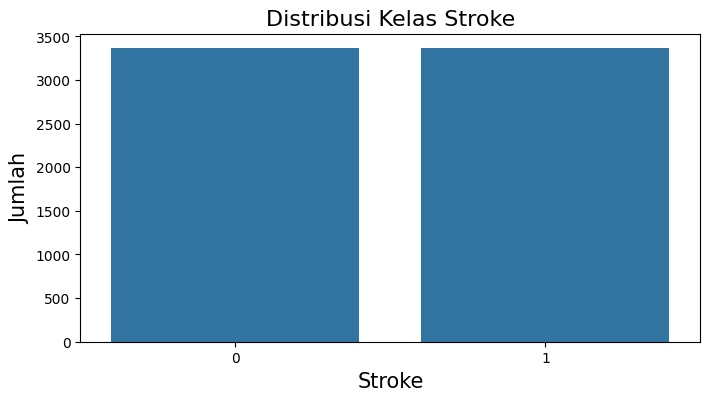

In [28]:
# Menghitung jumlah setiap kelas dalam 'stroke'
stroke_label = df_upsampled.stroke.value_counts()

# Ukuran gambar
plt.figure(figsize=(8, 4))

# Membuat grafik batang menggunakan seaborn
sns.barplot(x=stroke_label.index, y=stroke_label.values)

# Menambahkan label sumbu
plt.xlabel('Stroke', fontsize=15)
plt.ylabel('Jumlah', fontsize=15)
plt.title('Distribusi Kelas Stroke', fontsize=16)

plt.show()

## Melihat visualisasi distribusi kolom numerik setelah upsample

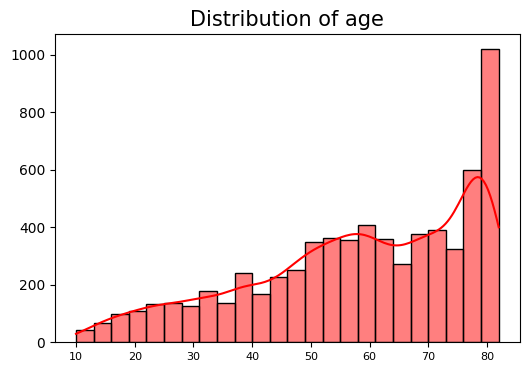

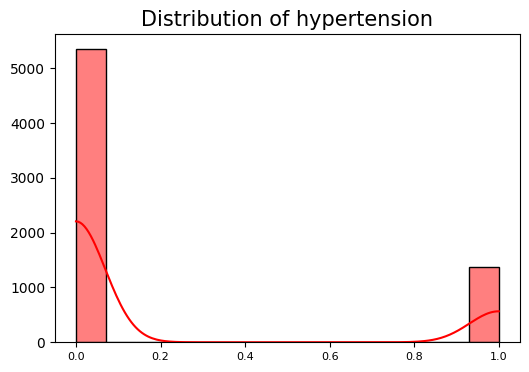

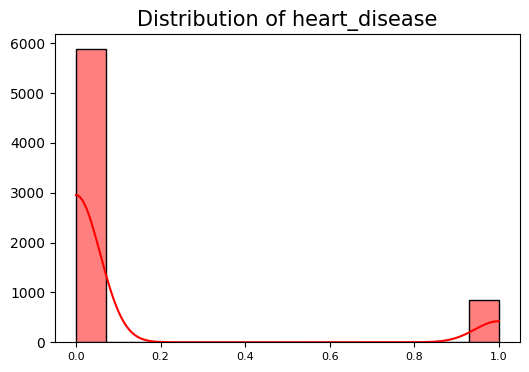

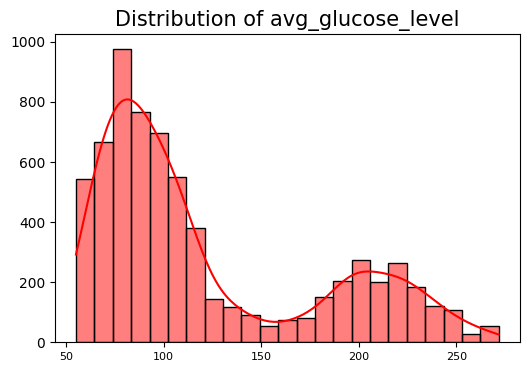

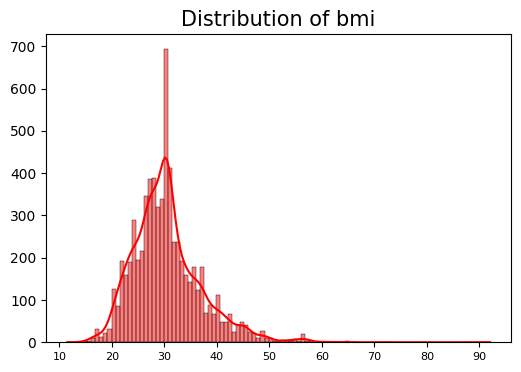

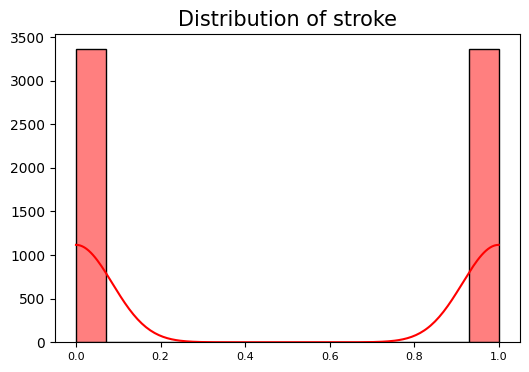

In [29]:
# Kolom numerik
numerical = [col for col in df_upsampled.columns if col not in categorical]

# Loop distribusi tiap kolom numerik
for i in numerical:
    plt.figure(figsize=(6,4))

    # Menggunakan histplot untuk distribusi data
    sns.histplot(df_upsampled[i], kde=True, color='red')

    plt.title(f'Distribution of {i}', fontsize=15)
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks(fontsize=8)

    # Menampilkan plot
    plt.show()
    print('\n')

## Melihat visualisasi distribusi kolom kategorikal setelah upsample

<ipython-input-30-c8f682885864>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_upsampled[i], y=df_upsampled['stroke'], order=sort_order(i), palette='Pastel1')


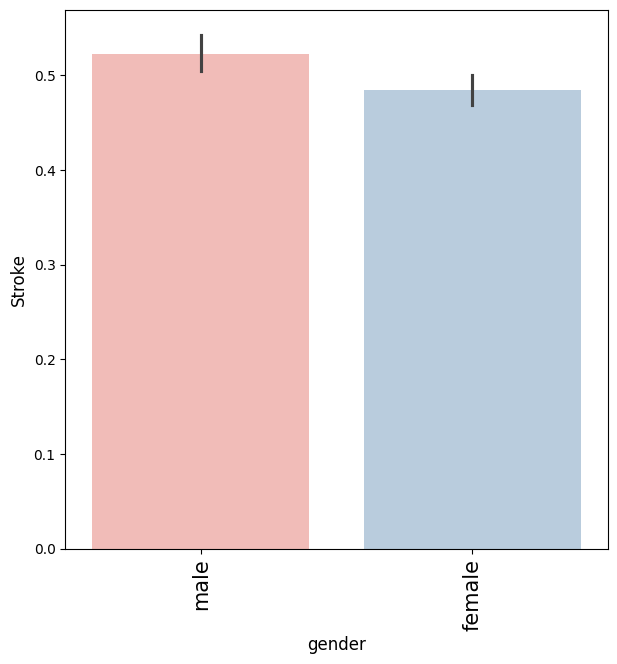

<ipython-input-30-c8f682885864>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_upsampled[i], y=df_upsampled['stroke'], order=sort_order(i), palette='Pastel1')


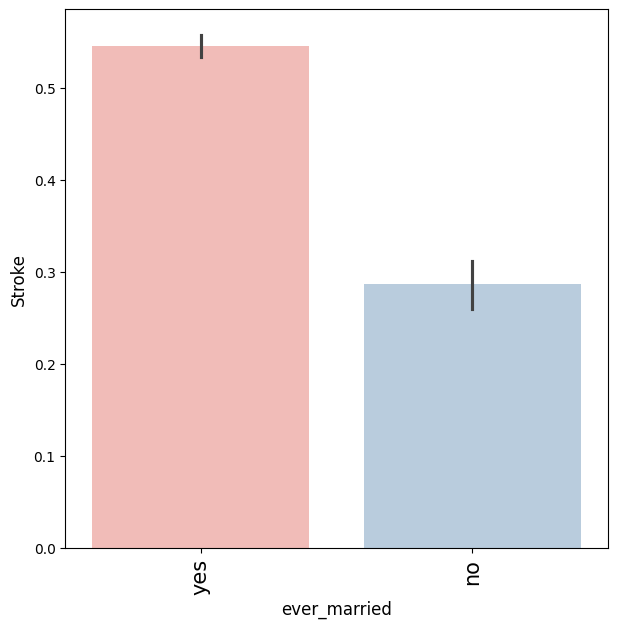

<ipython-input-30-c8f682885864>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_upsampled[i], y=df_upsampled['stroke'], order=sort_order(i), palette='Pastel1')


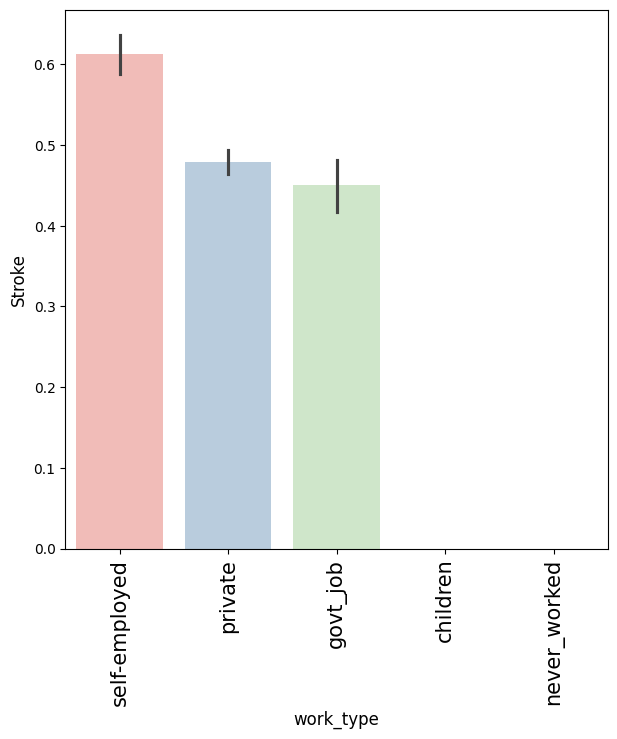

<ipython-input-30-c8f682885864>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_upsampled[i], y=df_upsampled['stroke'], order=sort_order(i), palette='Pastel1')


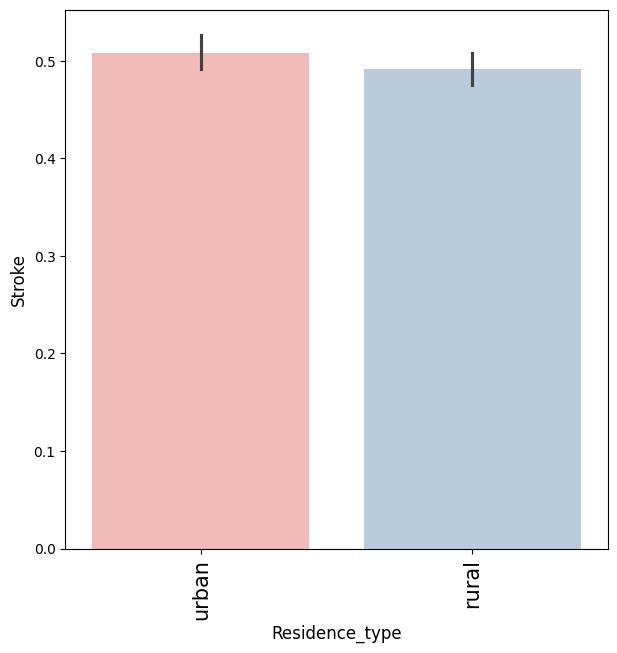

<ipython-input-30-c8f682885864>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_upsampled[i], y=df_upsampled['stroke'], order=sort_order(i), palette='Pastel1')


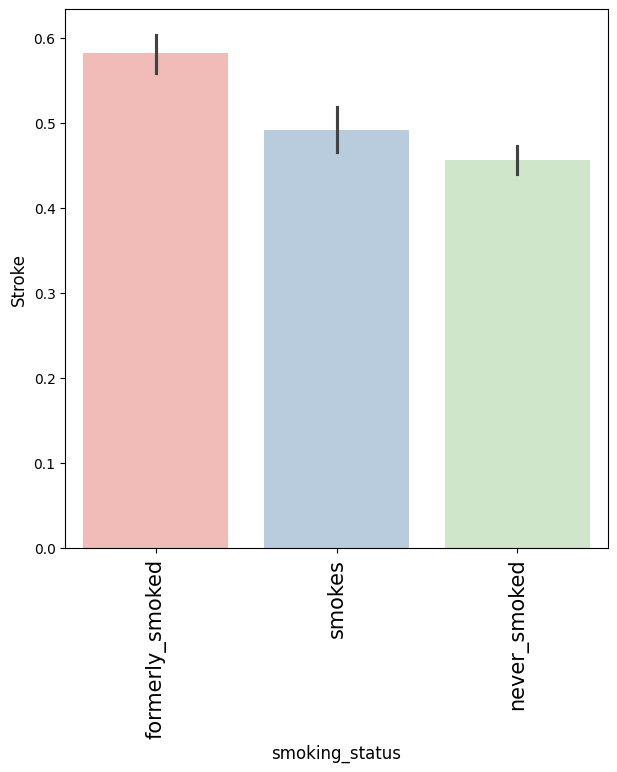

In [30]:
def sort_order(column):
    orders = (df_upsampled.groupby(column)['stroke'].mean().sort_values(ascending=False)).index
    return orders

for i in categorical:
    if df_upsampled[i].nunique() < 20:
        f, ax = plt.subplots(figsize=(7, 7))

        sns.barplot(x=df_upsampled[i], y=df_upsampled['stroke'], order=sort_order(i), palette='Pastel1')

        plt.xlabel(f'{i}', fontsize=12)
        plt.ylabel('Stroke', fontsize=12)
        plt.xticks(fontsize=15, rotation=90)

        plt.show()
        print('\n')


### **Korelasi matriks setelah upsample**

Untuk menunjukkan hubungan antara dua atau lebih variabel. Dalam konteks analisis data dan machine learning, korelasi matriks digunakan untuk Menunjukkan Hubungan Antara Variabel, memahami struktur data, dan untuk mengidentifikasi outlier.

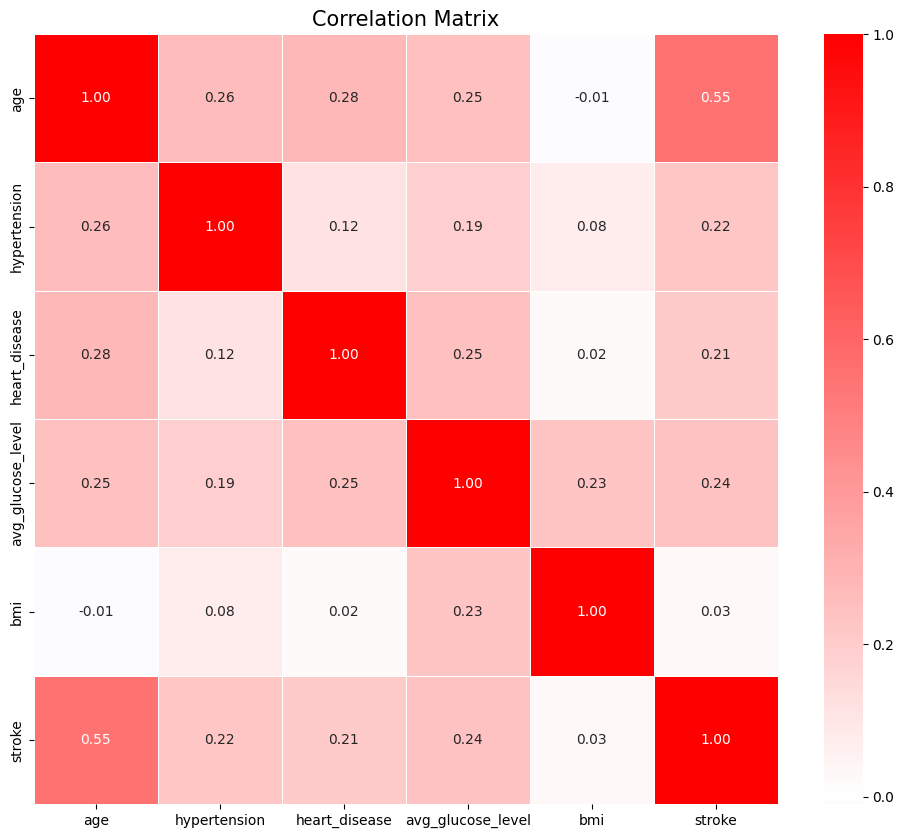

In [31]:
# Memilih hanya kolom numerik
numeric_columns = df_upsampled.select_dtypes(include=['number'])

# Membuat heatmap untuk matriks korelasi
plt.figure(figsize=(12, 10))

# Matriks korelasi dibulatkan ke 2 desimal
correlation_matrix = numeric_columns.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='bwr', center=0, linewidths=0.5, fmt='.2f')

plt.title('Correlation Matrix', size=15)
plt.show()

In [32]:
# Memilih hanya kolom numerik
numeric_columns = df_upsampled.select_dtypes(include=['number'])

# Menghitung matriks korelasi
correlation_matrix = numeric_columns.corr()

# Mendapatkan korelasi dengan 'stroke' dan mengurutkannya
stroke_correlations = correlation_matrix['stroke'].sort_values(ascending=False)[1:]

# Menampilkan hasil
print(stroke_correlations)


age                  0.552758
avg_glucose_level    0.243509
hypertension         0.222854
heart_disease        0.208461
bmi                  0.025795
Name: stroke, dtype: float64


## Outlier

Pendeteksian outlier adalah langkah krusial dalam analisis data yang bertujuan untuk meningkatkan kualitas dan konsistensi data, serta memastikan hasil analisis yang akurat. Dengan mengidentifikasi outlier, kita dapat mendeteksi kesalahan dalam pengukuran atau input data, memahami variabilitas yang ada, dan menemukan kejadian ekstrem yang mungkin memiliki implikasi signifikan. Selain itu, menangani outlier juga dapat meningkatkan kinerja model prediktif, sehingga model dapat lebih baik dalam generalisasi dan memprediksi data baru. Secara keseluruhan, pendeteksian outlier memungkinkan analisis data yang lebih mendalam dan relevan, serta membuka peluang untuk mendapatkan wawasan baru yang bermanfaat dalam pengambilan keputusan.

In [33]:
# Mendeteksi Outlier pada data

def outlier(data1):
    # Menghitung kuartil pertama (Q1) dan kuartil ketiga (Q3)
    Q1, Q3 = np.nanpercentile(data1, [25, 75])

    # Menghitung IQR
    IQR = Q3 - Q1

    # Menghitung batas bawah dan batas atas
    lowerRange = Q1 - (1.5 * IQR)
    upperRange = Q3 + (1.5 * IQR)

    return lowerRange, upperRange

In [34]:
df_upsampled.value_counts('stroke')

,count
stroke,
0,3363
1,3363


### Melihat distribusi fitur sebelum outlier dihapus

<ipython-input-35-571a34343a20>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_upsampled['age'])
<ipython-input-35-571a34343a20>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_upsampled['avg_glucose_level'])
<ipython-input-35-571a34343a20>:14: UserWarning: 

`distplot` is a deprecated 

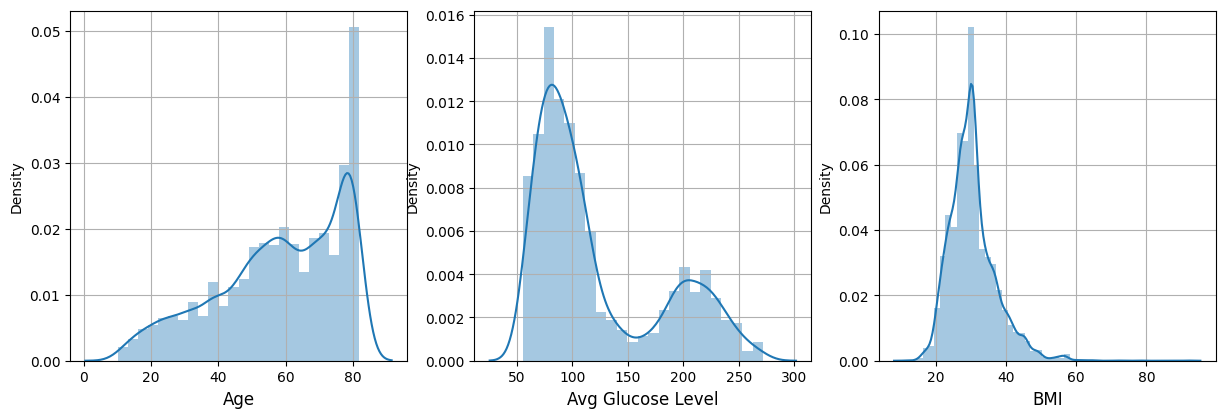

In [35]:
plt.figure(figsize=(20,10))

plt.subplot(2,4,1)
sns.distplot(df_upsampled['age'])
plt.xlabel('Age',fontsize = 12)
plt.grid()

plt.subplot(2,4,2)
sns.distplot(df_upsampled['avg_glucose_level'])
plt.xlabel('Avg Glucose Level',fontsize = 12)
plt.grid()

plt.subplot(2,4,3)
sns.distplot(df_upsampled['bmi'])
plt.xlabel('BMI',fontsize = 12)
plt.grid()

plt.show()

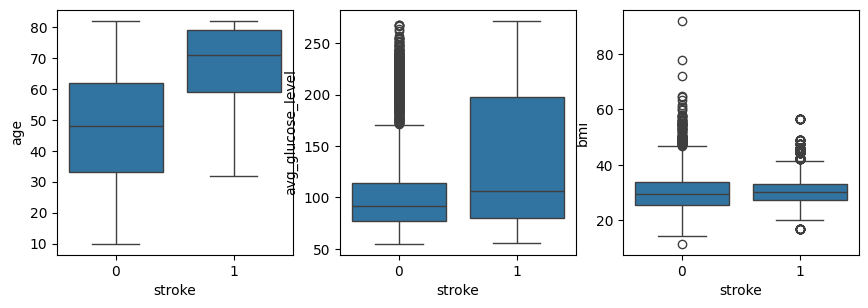

In [36]:
def graph(y):
    sns.boxplot(x="stroke", y=y, data=df_upsampled)

plt.figure(figsize=(14,7))

plt.subplot(2,4,1)
graph('age')

plt.subplot(2,4,2)
graph('avg_glucose_level')

plt.subplot(2,4,3)
graph('bmi')

plt.show()

In [37]:
lr,ur=outlier(df_upsampled['avg_glucose_level'][df_upsampled.stroke==0])
df_upsampled.drop(df_upsampled.index[(df_upsampled.avg_glucose_level > ur) & (df_upsampled.stroke == 0)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.avg_glucose_level < lr) & (df_upsampled.stroke == 0)],inplace=True)
df_upsampled.value_counts('stroke')

,count
stroke,
1,3363
0,2915


In [38]:
lr,ur=outlier(df_upsampled['avg_glucose_level'][df_upsampled.stroke==0])
df_upsampled.drop(df_upsampled.index[(df_upsampled.avg_glucose_level > ur) & (df_upsampled.stroke == 0)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.avg_glucose_level < lr) & (df_upsampled.stroke == 0)],inplace=True)
df_upsampled.value_counts('stroke')

,count
stroke,
1,3363
0,2829


In [39]:
lr,ur=outlier(df_upsampled['bmi'][df_upsampled.stroke==1])
df_upsampled.drop(df_upsampled.index[(df_upsampled.bmi > ur) & (df_upsampled.stroke == 1)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.bmi < lr) & (df_upsampled.stroke == 1)],inplace=True)
df_upsampled.value_counts('stroke')

,count
stroke,
1,3176
0,2829


In [40]:
lr,ur=outlier(df_upsampled['bmi'][df_upsampled.stroke==1])
df_upsampled.drop(df_upsampled.index[(df_upsampled.bmi > ur) & (df_upsampled.stroke == 0)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.bmi < lr) & (df_upsampled.stroke == 0)],inplace=True)
df_upsampled.value_counts('stroke')

,count
stroke,
1,3176
0,2497


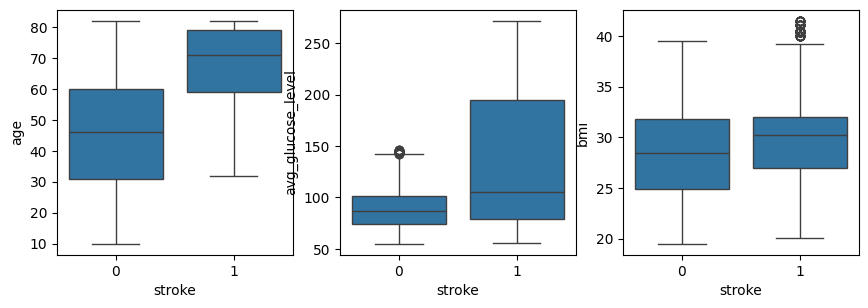

In [41]:
def graph(y):
    sns.boxplot(x="stroke", y=y, data=df_upsampled)

plt.figure(figsize=(14,7))

plt.subplot(2,4,1)
graph('age')

plt.subplot(2,4,2)
graph('avg_glucose_level')

plt.subplot(2,4,3)
graph('bmi')

plt.show()

In [42]:
lr,ur=outlier(df_upsampled['bmi'][df_upsampled.stroke==1])
df_upsampled.drop(df_upsampled.index[(df_upsampled.bmi > ur) & (df_upsampled.stroke == 1)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.bmi < lr) & (df_upsampled.stroke == 1)],inplace=True)
df_upsampled.value_counts('stroke')

,count
stroke,
1,3075
0,2497


In [43]:
lr,ur=outlier(df_upsampled['avg_glucose_level'][df_upsampled.stroke==0])
df_upsampled.drop(df_upsampled.index[(df_upsampled.avg_glucose_level > ur) & (df_upsampled.stroke == 0)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.avg_glucose_level < lr) & (df_upsampled.stroke == 0)],inplace=True)
df_upsampled.value_counts('stroke')

,count
stroke,
1,3075
0,2474


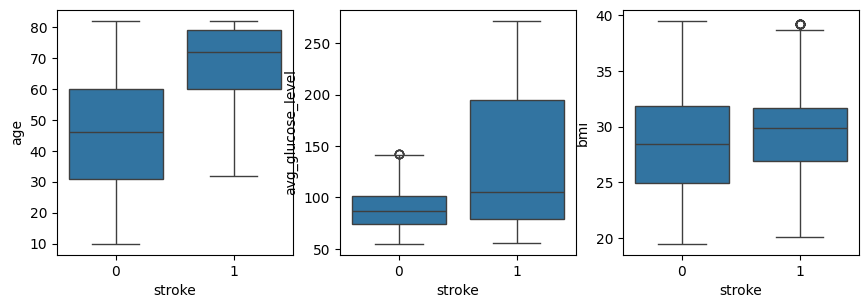

In [44]:
def graph(y):
    sns.boxplot(x="stroke", y=y, data=df_upsampled)

plt.figure(figsize=(14,7))

plt.subplot(2,4,1)
graph('age')

plt.subplot(2,4,2)
graph('avg_glucose_level')

plt.subplot(2,4,3)
graph('bmi')

plt.show()

In [45]:
lr,ur=outlier(df_upsampled['avg_glucose_level'][df_upsampled.stroke==0])
df_upsampled.drop(df_upsampled.index[(df_upsampled.avg_glucose_level > ur) & (df_upsampled.stroke == 0)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.avg_glucose_level < lr) & (df_upsampled.stroke == 0)],inplace=True)
df_upsampled.value_counts('stroke')

,count
stroke,
1,3075
0,2469


In [46]:
lr,ur=outlier(df_upsampled['bmi'][df_upsampled.stroke==1])
df_upsampled.drop(df_upsampled.index[(df_upsampled.bmi > ur) & (df_upsampled.stroke == 1)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.bmi < lr) & (df_upsampled.stroke == 1)],inplace=True)
df_upsampled.value_counts('stroke')

,count
stroke,
1,3056
0,2469


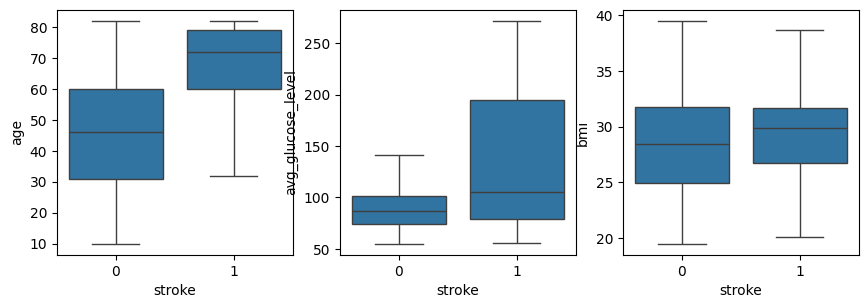

In [47]:
def graph(y):
    sns.boxplot(x="stroke", y=y, data=df_upsampled)

plt.figure(figsize=(14,7))

plt.subplot(2,4,1)
graph('age')

plt.subplot(2,4,2)
graph('avg_glucose_level')

plt.subplot(2,4,3)
graph('bmi')

### Melihat distribusi fitur setelah outlier dihapus

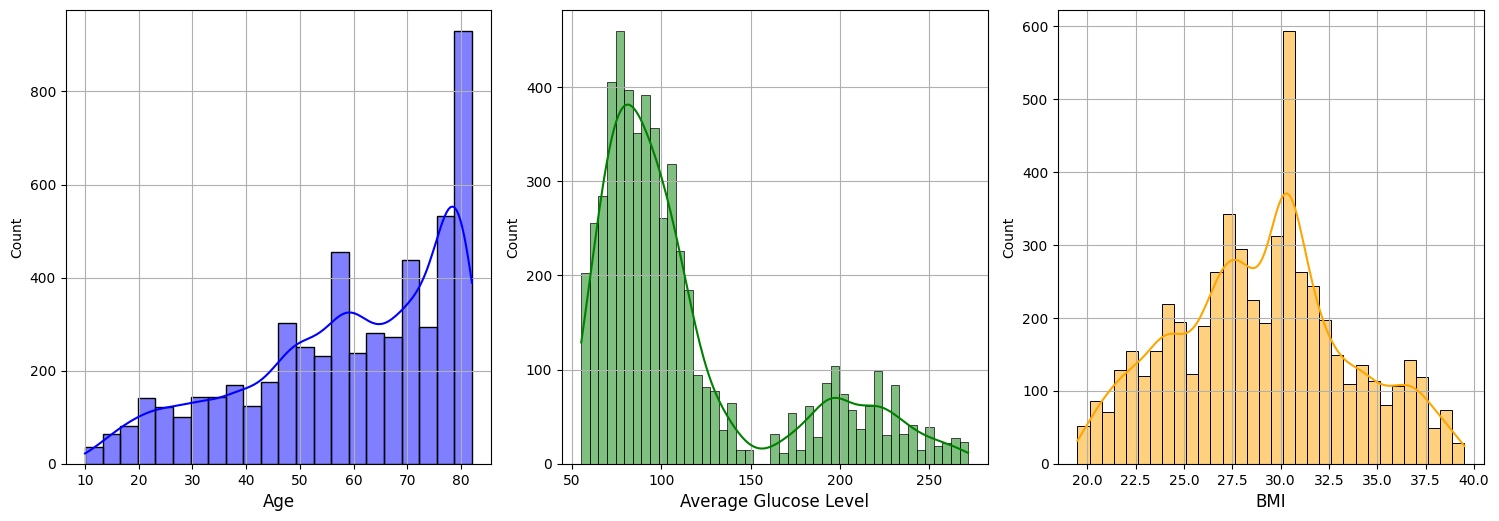

In [48]:
plt.figure(figsize=(20, 10))

# Plot distribusi untuk kolom 'age'
plt.subplot(2, 4, 1)
sns.histplot(df_upsampled['age'], kde=True, color='blue')
plt.xlabel('Age', fontsize=12)
plt.grid()

# Plot distribusi untuk kolom 'avg_glucose_level'
plt.subplot(2, 4, 2)
sns.histplot(df_upsampled['avg_glucose_level'], kde=True, color='green')
plt.xlabel('Average Glucose Level', fontsize=12)
plt.grid()

# Plot distribusi untuk kolom 'bmi'
plt.subplot(2, 4, 3)
sns.histplot(df_upsampled['bmi'], kde=True, color='orange')
plt.xlabel('BMI', fontsize=12)
plt.grid()

plt.tight_layout()
plt.show()

In [49]:
df_upsampled.reset_index(drop=True,inplace=True)

### **One Hot Encoding**

One hot encoding dapat digunakan untuk mengubah kolom-kolom kategorikal menjadi format numerik biner melalui proses one-hot encoding. Tujuannya adalah agar model machine learning yang hanya bisa bekerja dengan data numerik dapat memahami dan menggunakan informasi dari kolom kategorikal seperti gender, ever_married, work_type, Residence_type, dan smoking_status. Setelah dilakukan one-hot encoding, kategori dari kolom-kolom tersebut akan diubah menjadi beberapa kolom biner, yang kemudian dapat digunakan oleh model untuk analisis atau prediksi yang lebih akurat.

In [50]:
final = pd.get_dummies(df_upsampled, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])
final.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_female,gender_male,ever_married_no,ever_married_yes,work_type_children,work_type_govt_job,work_type_never_worked,work_type_private,work_type_self-employed,Residence_type_rural,Residence_type_urban,smoking_status_formerly_smoked,smoking_status_never_smoked,smoking_status_smokes
0,58.0,1,0,87.96,39.2,0,False,True,False,True,False,False,False,True,False,False,True,False,True,False
1,70.0,0,0,69.04,35.9,0,True,False,False,True,False,False,False,True,False,True,False,True,False,False
2,32.0,0,0,77.67,32.3,0,True,False,False,True,False,False,False,True,False,True,False,False,False,True
3,79.0,0,1,57.08,22.0,0,False,True,False,True,False,False,False,True,False,False,True,True,False,False
4,37.0,0,0,73.50,26.1,0,True,False,False,True,False,False,False,True,False,True,False,True,False,False


### Melihat korelasi matriks setelah encoding

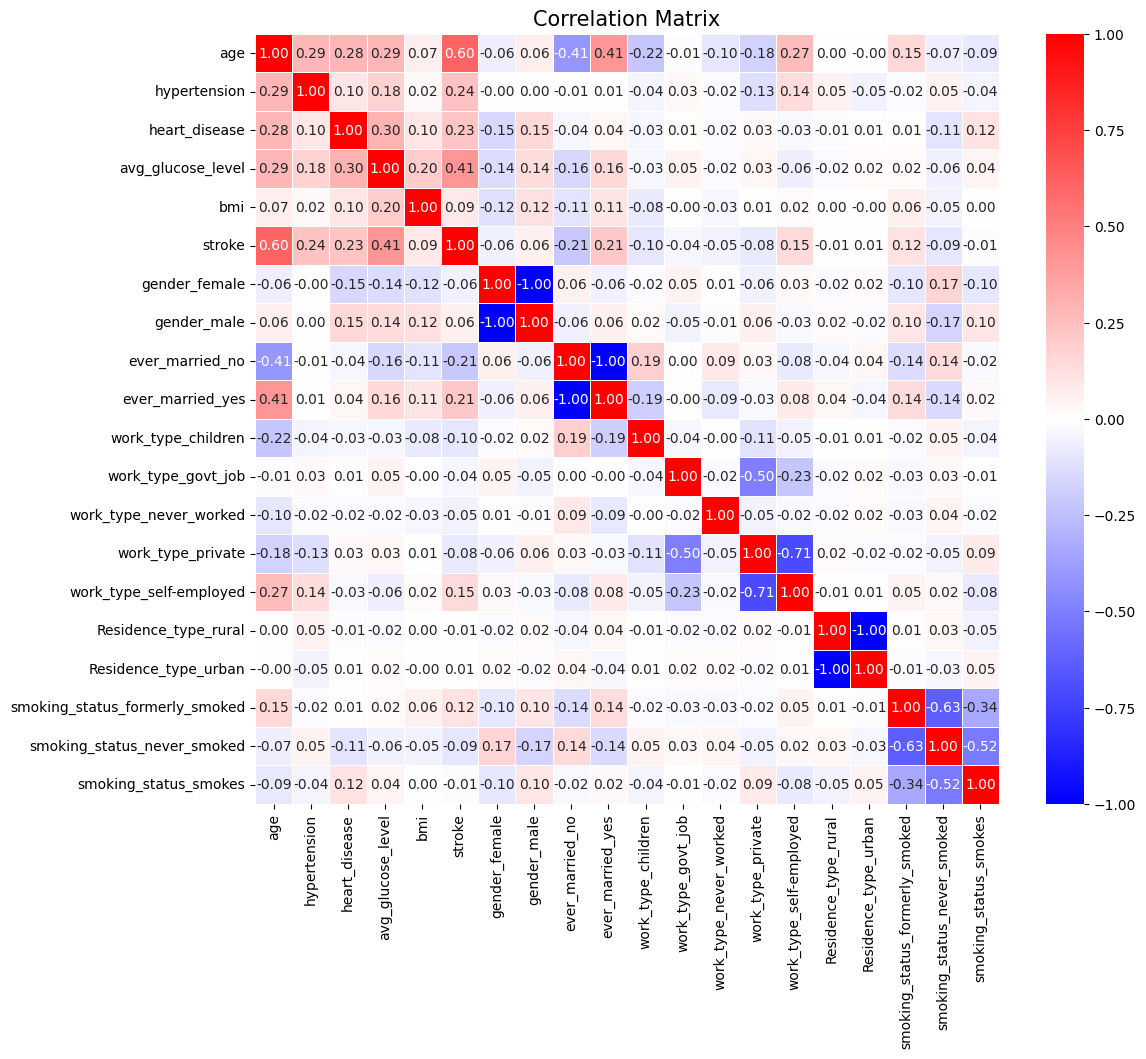

In [51]:
plt.figure(figsize=(12, 10))

# Menghitung matriks korelasi
correlation_matrix = final.corr()

# Membuat heatmap untuk matriks korelasi
sns.heatmap(correlation_matrix, annot=True, cmap='bwr', center=0, linewidths=0.5, fmt='.2f')
plt.title('Correlation Matrix', fontsize=15)

# Menampilkan heatmap
plt.show()

## **Modeling**

### **Membagi data training & testing kemudian melakukan normalisasi**

Membagi data menjadi training dan testing bertujuan untuk mengevaluasi kinerja model secara objektif, di mana data training digunakan untuk melatih model dan data testing untuk menguji model pada data baru, sehingga menghindari overfitting dan memastikan model dapat melakukan generalisasi dengan baik. Sementara itu, normalisasi dilakukan untuk menyelaraskan skala fitur-fitur dalam dataset agar berada dalam rentang yang sama, sehingga algoritma machine learning dapat bekerja lebih efektif tanpa dipengaruhi oleh perbedaan skala antar fitur, yang pada akhirnya meningkatkan akurasi dan kecepatan model dalam mendeteksi pola.

In [52]:
final_features=final[['age', 'avg_glucose_level', 'bmi']]
target = final['stroke']

In [53]:
# Memisahkan data training dan testing
X_train, X_test, y_train, y_test = train_test_split(final_features,target,test_size = 0.2,random_state =2)

# Normalisasi data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### **Modeling Menggunakan Random Forest Classifier**

Random Forest Classifier adalah algoritma pembelajaran ensemble yang terdiri dari banyak pohon keputusan (decision trees) yang bekerja secara bersama-sama. Random Forest Classifier dari sklearn.ensemble dengan pengaturan n_estimators=30 dan max_features=3. Kelebihan dari algoritma ini adalah kemampuannya untuk menentukan variabel mana yang signifikan dalam proses klasifikasi, yang membantu dalam pemahaman model. Di sisi lain, kelemahan dari algoritma ini adalah kompleksitas yang tinggi, yang dapat menyebabkan waktu pelatihan yang lebih lama dan penggunaan sumber daya yang lebih besar, terutama saat bekerja dengan dataset yang besar.

In [54]:
# Menggunakan Random Forest Classifier

# Inisialisasi Model
rf = RandomForestClassifier(n_estimators=30, max_features=3, random_state=0).fit(X_train_scaled, y_train)
rf_pred= rf.score(X_test_scaled, y_test)

# Evaluasi Model
rf_train_accuracy =rf.score(X_train_scaled,y_train)
rf_accuracy = rf.score(X_test_scaled,y_test)

# Prediksi Probabilitas
pred_prob_rf = rf.predict_proba(X_test_scaled)


print("Training score: {}".format(rf.score(X_train_scaled, y_train)))
print("Test score: {}".format(rf.score(X_test_scaled, y_test)))

Training score: 0.9997737556561086
Test score: 0.9809954751131221


### **Modeling Menggunakan K-Neigbors Classifier**

KNeighborsClassifier dari sklearn.neighbors adalah algoritma KNN yang melakukan klasifikasi berdasarkan tetangga terdekat. Dengan n_neighbors=2, algoritma ini akan mempertimbangkan dua tetangga terdekat untuk menentukan kelas dari sampel baru. Pemilihan nilai K sangat mempengaruhi kinerja model; dalam hal ini, dua tetangga terdekat akan digunakan untuk memprediksi kelas berdasarkan mayoritas kelas dari dua tetangga tersebut. Metrik jarak, seperti Euclidean, digunakan untuk mengukur kedekatan antar sampel.

In [55]:
# Menggunakan K-Neighbors Classifier

knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
knn_pred=knn.score(X_test_scaled, y_test)

knn_train_accuracy =knn.score(X_train_scaled,y_train)
knn_accuracy = knn.score(X_test_scaled,y_test)
pred_prob_knn = knn.predict_proba(X_test_scaled)

print("Training score: {}".format(knn.score(X_train_scaled, y_train)))
print("Test score: {}".format(knn.score(X_test_scaled, y_test)))

Training score: 0.9561085972850679
Test score: 0.9402714932126697


## **Evaluasi**

### Feature Importance

Feature importance digunakan untuk mengetahui seberapa besar kontribusi setiap fitur (variabel independen) dalam membantu model melakukan prediksi. Dalam konteks Random Forest (dan beberapa algoritma lainnya), feature importance mengukur seberapa "penting" suatu fitur berdasarkan seberapa sering dan seberapa efektif fitur tersebut digunakan oleh pohon-pohon keputusan dalam hutan untuk membagi data.

In [56]:
final.corr()['stroke'].sort_values(ascending=False)[1:]

,stroke
age,0.602451
avg_glucose_level,0.411079
hypertension,0.239791
heart_disease,0.230686
ever_married_yes,0.213680
work_type_self-employed,0.145400
smoking_status_formerly_smoked,0.115839
bmi,0.090371
gender_male,0.061578
Residence_type_urban,0.007083


In [57]:
feature_final=final[['age','hypertension','heart_disease','avg_glucose_level','bmi','gender_female','gender_male','ever_married_no','ever_married_yes','work_type_children','work_type_govt_job','work_type_never_worked','work_type_private','work_type_self-employed','Residence_type_rural','Residence_type_urban','smoking_status_formerly_smoked','smoking_status_never_smoked','smoking_status_smokes']]
target=final[['stroke']]

Menggunakan RandomForestClassifier dari Scikit-learn

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


<Axes: >

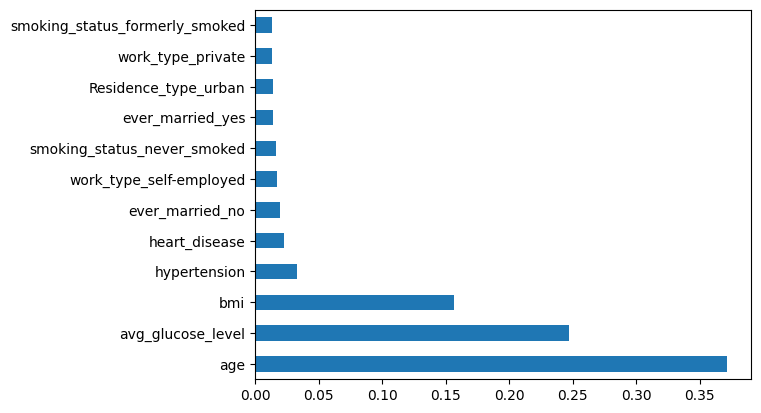

In [58]:
rf = RandomForestClassifier()
rf_model=rf.fit(feature_final,target)
feat_importances = pd.Series(rf_model.feature_importances_, index=feature_final.columns)
feat_importances.nlargest(12).plot(kind='barh')

Berdasarkan data di atas, dapat disimpulkan bahwa fitur Age, Average Glucose Level, dan BMI memiliki peranan yang sangat penting untuk digunakan dalam membuat model machine learning

### **Matriks Evaluasi - Random Forest Classifier**

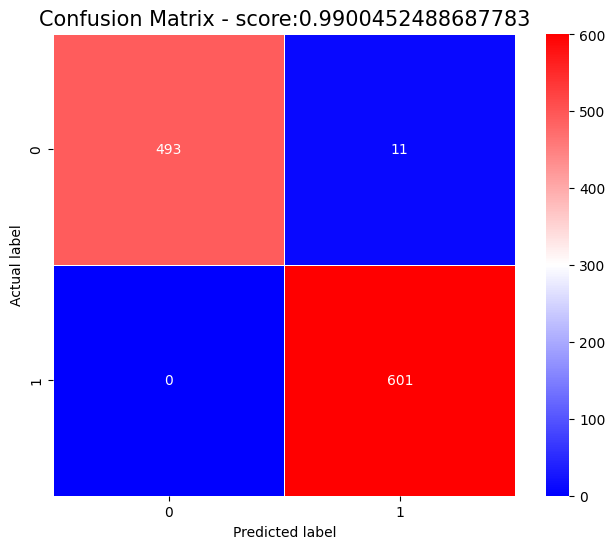

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       504
           1       0.98      1.00      0.99       601

    accuracy                           0.99      1105
   macro avg       0.99      0.99      0.99      1105
weighted avg       0.99      0.99      0.99      1105



In [59]:
# Random Forest Classifier

rf_model=RandomForestClassifier(random_state=0)
rf_model.fit(X_train_scaled,y_train)
y_pred=rf_model.predict(X_test_scaled)
from sklearn import metrics

rf_cm = metrics.confusion_matrix(y_test, y_pred)

# Visualisasi confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(rf_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'bwr');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred))

### **Matriks Evaluasi - KNeighborsClassifier**

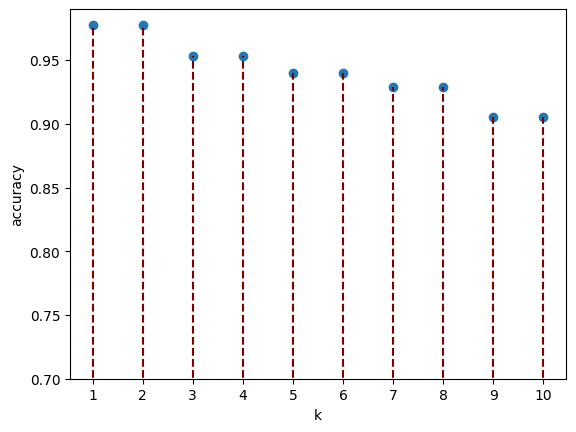

In [60]:
k_range = range(1,11)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_scaled, y_train)
    scores.append(knn.score(X_test_scaled, y_test))

plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.vlines(k_range,0, scores, linestyle="dashed", colors='maroon')
plt.ylim(0.70,0.99)
plt.xticks([i for i in range(1,11)]);

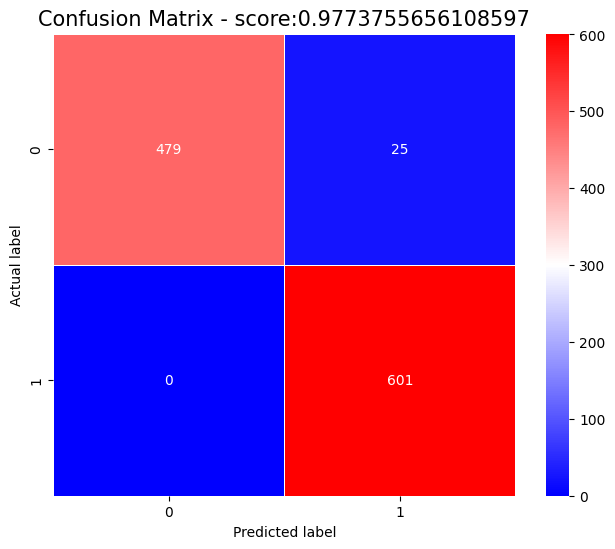

              precision    recall  f1-score   support

           0       1.00      0.95      0.97       504
           1       0.96      1.00      0.98       601

    accuracy                           0.98      1105
   macro avg       0.98      0.98      0.98      1105
weighted avg       0.98      0.98      0.98      1105



In [61]:
# KNeighborsClassifier

knn_model=KNeighborsClassifier(n_neighbors = 2)
knn_model.fit(X_train_scaled,y_train)
y_pred=knn_model.predict(X_test_scaled)
from sklearn import metrics

knn_cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(knn_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'bwr');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred))

### **Perbandingan Akurasi**

In [62]:
# Perbandingan Akurasi

Model_Name = ['Random Forest','KNeighbors']
Accuracy = [rf_pred,knn_pred]

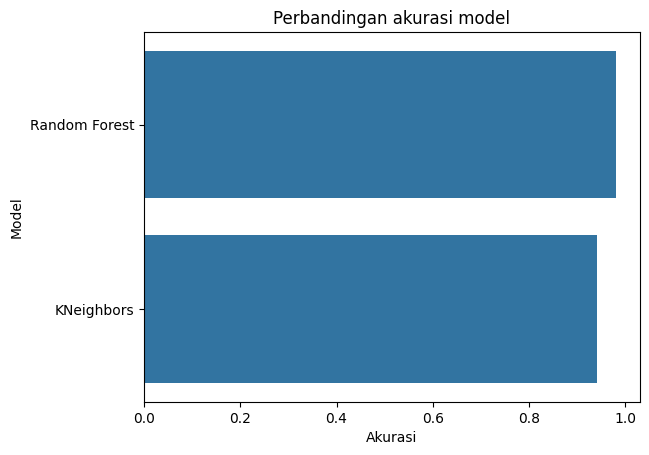

In [63]:
plt.bar
plt.title('Perbandingan akurasi model')
plt.xlabel('Akurasi')
plt.ylabel('Model')
sns.barplot(x = Accuracy,y = Model_Name)
plt.show()

Menggunakan Forest Classifier :

- `Akurasi` : 99%
- `Precision 0` : 100%
- `Recall 0` : 98%
- `Precision 1` : 98%
- `Recall 1` : 100%
- `F1-Score` : 0.99

<br>

Menggunakan K-Neighbors Classifier :

- `Akurasi` : 98%
- `Precision 0` : 100%
- `Recall 0` : 95%
- `Precision 1` : 96%
- `Recall 1` : 100%
- `F1-Score` : 0.98

<br>



Secara keseluruhan penyelesaian proyek ini sangat berhasil, kedua model yang digunakan dapat menunjukkan kinerjanya dengan sangat baik. Goals dapat di capai melalui visualisasi data yang di gambarkan dan mampu menyelesaikan permasalahan yang ada. Hanya saja untuk pemilihan model dengan kinerja terbaik jatuh pada model dengan Forest Classifier, karena model ini sedikit lebih unggul dalam hal akurasi dan keseimbangan antara precision dan recall di kedua kelas dibandingkan K-Neighbors Classifier. Meskipun kedua model cukup baik dalam mengklasifikasikan data, Forest Classifier memiliki performa yang lebih konsisten dan sedikit lebih baik secara keseluruhan.